In [4]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


%matplotlib inline
sns.set()
#preprocess
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
#models
from sklearn.svm import SVC
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from scipy.stats import randint as sp_randint
from sklearn.ensemble import BaggingClassifier,VotingClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

#check
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
#save
import pickle as pk

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [10]:
df = pd.read_csv("dataset.csv")
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df = df.fillna(df["TotalCharges"].mean())
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
def replace(value):
    if value == 0:
        return "NO"
    else:
        return "Yes"


df['SeniorCitizen'] = df['SeniorCitizen'].apply(replace)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


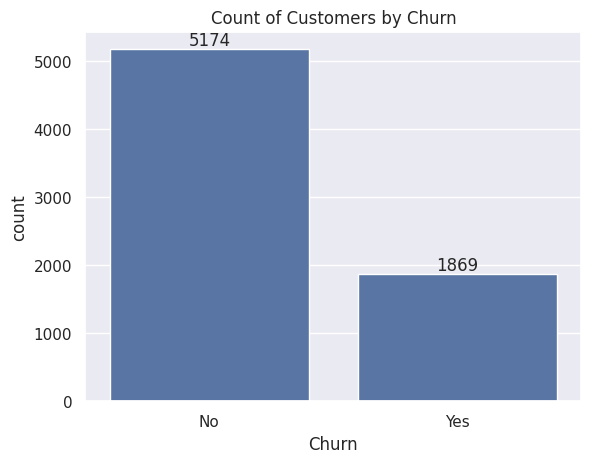

In [21]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

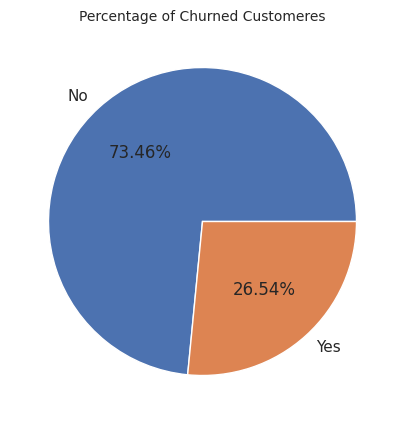

In [22]:
plt.figure(figsize = (5,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customeres", fontsize = 10)
plt.show()

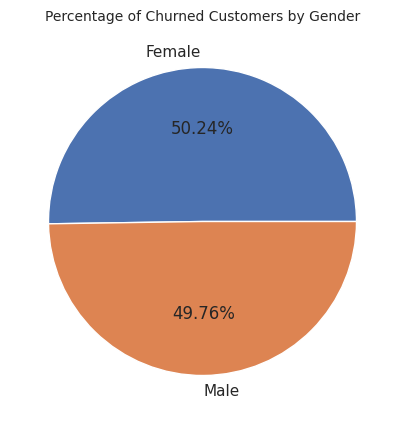

In [23]:
churned_customers = df[df['Churn'] == 'Yes']
gb = churned_customers.groupby("gender").agg({'gender': "count"})
plt.figure(figsize=(5, 5))
plt.pie(gb['gender'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers by Gender", fontsize=10)
plt.show()


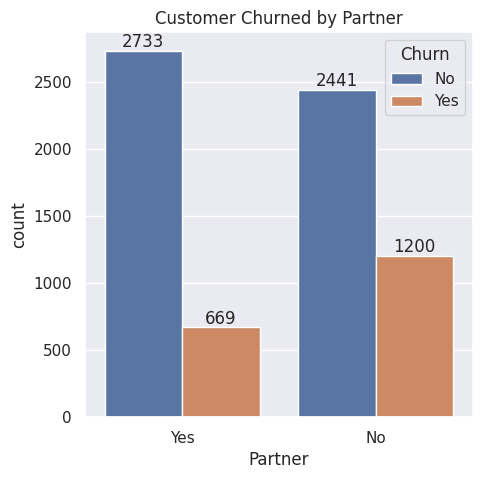

In [24]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by Partner')
ax = sns.countplot(x = 'Partner',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

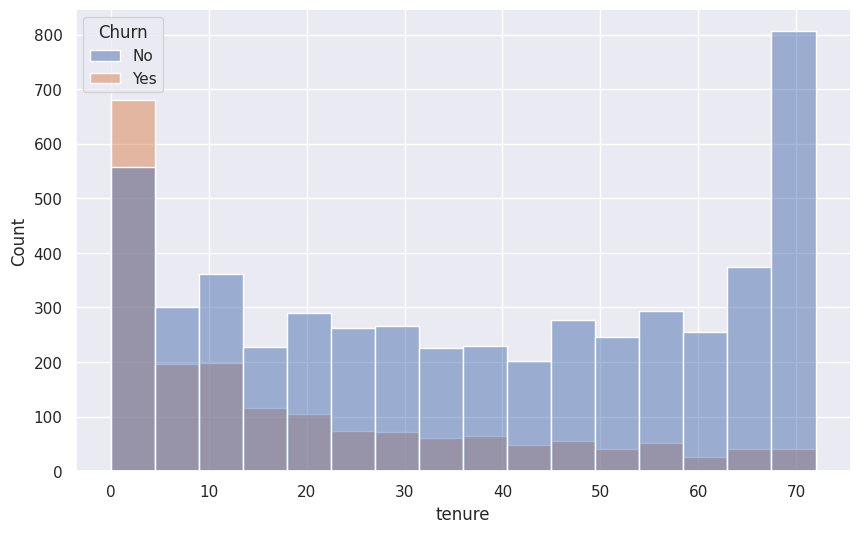

In [25]:
plt.figure(figsize = (10,6))
sns.histplot(x = 'tenure', data = df, hue= 'Churn')
plt.show()

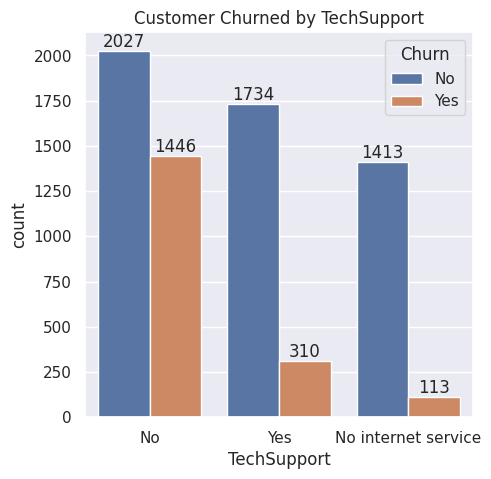

In [26]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by TechSupport')
ax = sns.countplot(x = 'TechSupport',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

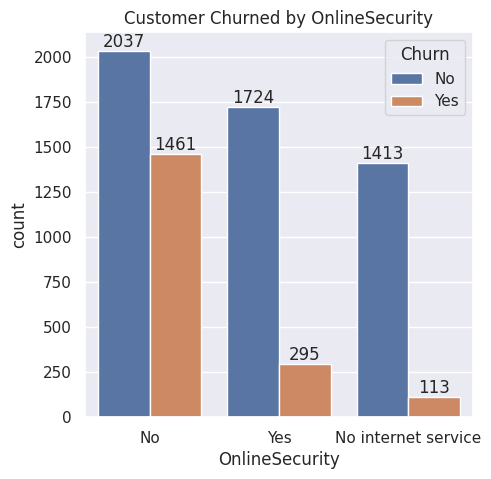

In [27]:
plt.figure(figsize= (5,5))
plt.title('Customer Churned by OnlineSecurity')
ax = sns.countplot(x = 'OnlineSecurity',data = df, hue= 'Churn' )
for container in ax.containers:
    ax.bar_label(container)
plt.show()

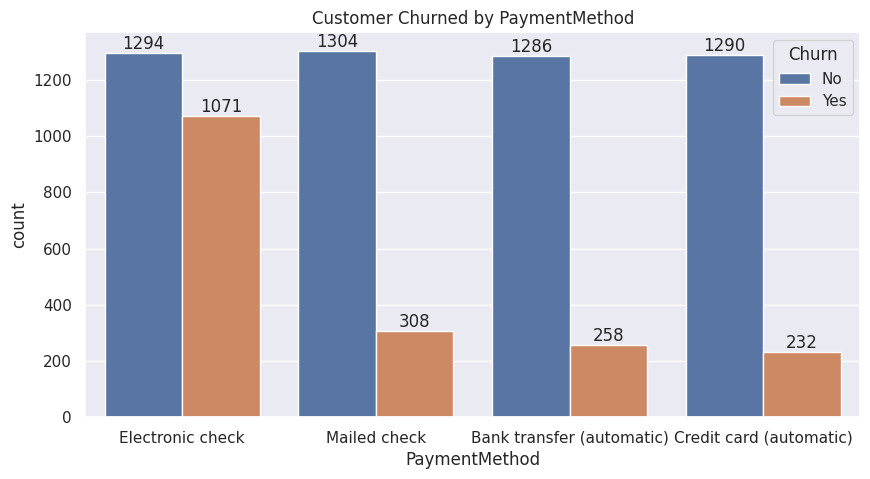

In [28]:
plt.figure(figsize = (10,5))
plt.title('Customer Churned by PaymentMethod')
ax = sns.countplot(x = 'PaymentMethod', data = df, hue= 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


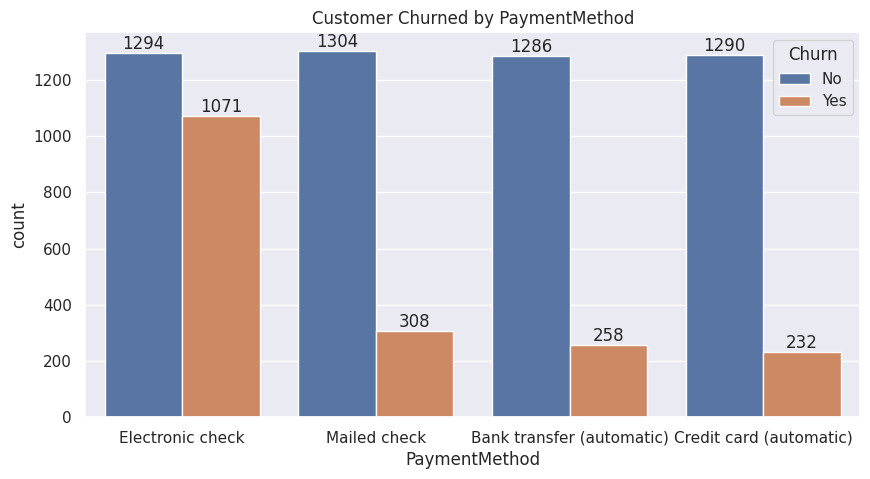

In [29]:
plt.figure(figsize = (10,5))
plt.title('Customer Churned by PaymentMethod')
ax = sns.countplot(x = 'PaymentMethod', data = df, hue= 'Churn')
for container in ax.containers:
    ax.bar_label(container)
plt.show()


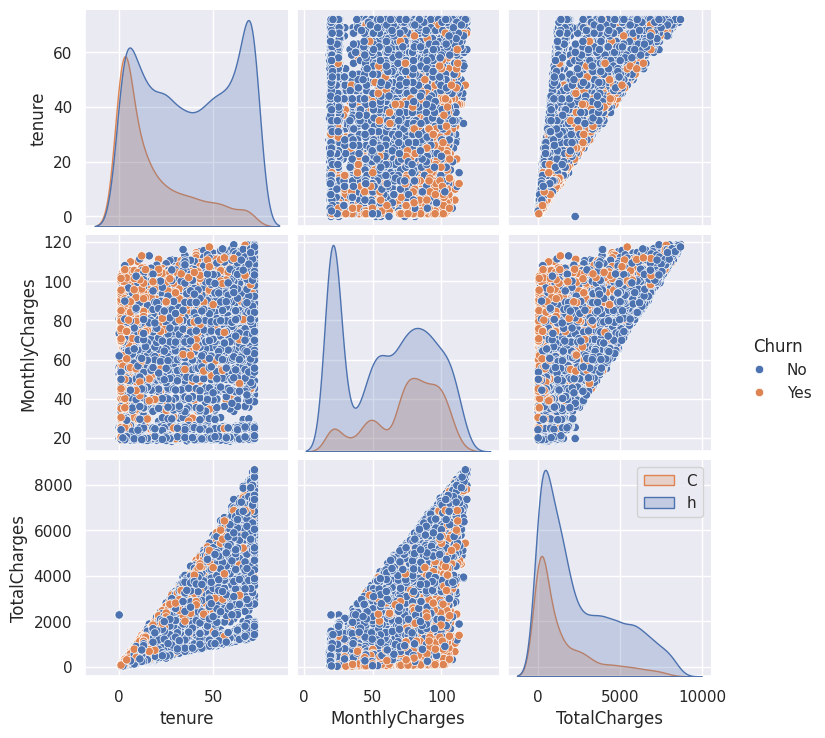

In [30]:
sns.pairplot(data = df , hue= 'Churn')
plt.legend('Churn')

Garbage value check

In [31]:
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print('****'*10)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
****************************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
****************************************
SeniorCitizen
Yes    7043
Name: count, dtype: int64
****************************************
Partner
No     3641
Yes    3402
Name: count, dtype: int64
****************************************
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
****************************************
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
****************************************
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
****************************************
InternetService
Fiber optic    3096
DSL            2421
No             152

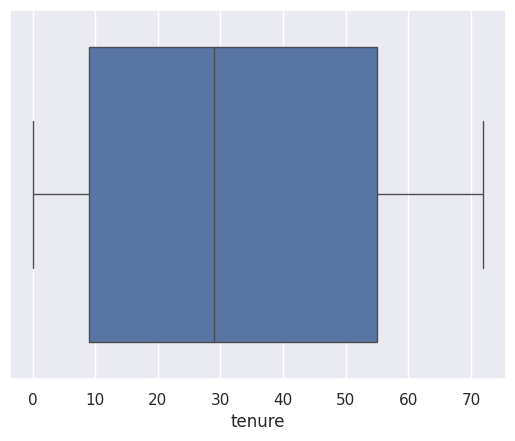

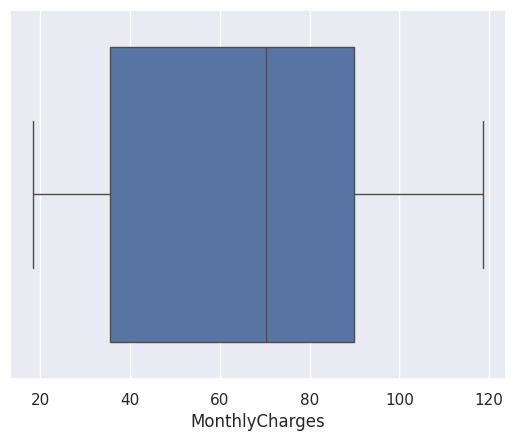

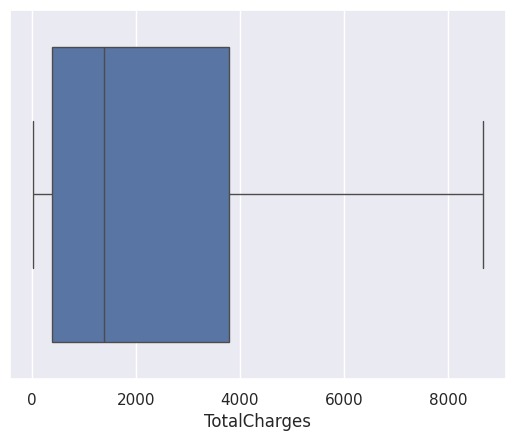

In [32]:
#identify outliers
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [35]:
le = LabelEncoder()
df1=df.copy()
df2 = df.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,Yes,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,Yes,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,Yes,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,Yes,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Label Encoding

In [39]:
columns_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in columns_to_encode:
    df1[col] = le.fit_transform(df1[col])

columns_to_one_hot_encode = ['MultipleLines', 'OnlineBackup', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

for col in columns_to_one_hot_encode:
    one_hot = pd.get_dummies(df1[col], prefix=col, drop_first=True)
    df1 = pd.concat([df1, one_hot], axis=1)
    df1.drop(col, axis=1, inplace=True)

df1.drop('customerID', axis=1, inplace=True)

df1['MonthlyCharges'] = np.log1p(df1['MonthlyCharges'])  # log(1+x) to avoid log(0)
df1['TotalCharges'] = np.log1p(df1['TotalCharges'])

scaler = StandardScaler()
df1['tenure'] = scaler.fit_transform(df1[['tenure']])


df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,3.429137,3.429137,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,4.059581,7.544597,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,4.004602,4.692723,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,3.768153,7.518471,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,4.272491,5.028148,1,...,False,False,False,False,False,False,False,False,True,False


In [43]:
y = df1['Churn']
x = df1.drop(columns=['Churn'])
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.277445,0,1,3.429137,3.429137,True,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,0.066327,1,0,4.059581,7.544597,False,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,-1.236724,1,1,4.004602,4.692723,False,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,0.514251,0,0,3.768153,7.518471,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,-1.236724,1,1,4.272491,5.028148,False,...,False,False,False,False,False,False,False,False,True,False


In [44]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.60,random_state=42)
pickle.dump()


NameError: name 'train_test_split' is not defined

In [47]:
Clf = DecisionTreeClassifier()
Clf.fit(xtrain,ytrain)
ypred = Clf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2069
           1       0.49      0.51      0.50       749

    accuracy                           0.73      2818
   macro avg       0.66      0.66      0.66      2818
weighted avg       0.73      0.73      0.73      2818



After sampling result

In [48]:
Clf.score(xtest,ytest)

0.7299503193754435

In [49]:
Clf.score(x,y)

0.8906715888115859

OverSampling

In [50]:
over = RandomOverSampler(random_state=42)
x_new , y_new = over.fit_resample(x,y)

Holdout Cross Validation

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, train_size=.60,random_state=42)
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [53]:
dt.score(xtest,ytest) # after sampling

0.8429951690821256

In [54]:
x.shape
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, train_size=.60,random_state=42)
dt.fit(xtrain1, ytrain1)

DecisionTreeClassifier()

In [55]:
dt.score(xtest1,ytest1) # without Sampling

0.7310149041873669

Random Forest

In [56]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)


train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)


test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)


Training accuracy: 0.9977448453608248
Testing accuracy: 0.8751207729468599


In [57]:
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)


test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9363724226804123
Testing accuracy: 0.8429951690821256


In [58]:
kfold = KFold(n_splits=5, shuffle=True)
result = cross_val_score(rf, x_new, y_new, cv=kfold)
result

array([0.89710145, 0.89758454, 0.89371981, 0.89511841, 0.89366844])

In [59]:
result.mean()

0.8954385301307781

In [60]:
result.max()

0.8975845410628019

In [61]:
result.min()

0.8936684388593523

Dimensinality Reducing

In [62]:
mmx = MinMaxScaler()
scaled_x = mmx.fit_transform(x_new)
scaled_x.shape

(10348, 30)

In [63]:
scaled_x

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x_pca = pca.fit_transform(scaled_x)
x_pca

array([[-0.03001095, -0.73658093, -0.96858633],
       [ 0.19685342,  0.08459309, -1.16765111],
       [ 0.11786174, -0.46659207, -1.07230097],
       ...,
       [ 0.47608174, -1.00703352, -1.42507937],
       [-0.68368131, -0.79035426,  0.74643991],
       [ 2.75260704,  0.25950304,  0.12927482]])

Outcome

In [66]:
features = pd.DataFrame(x_pca, columns=['pca1','pca2','pca3'])
xtrain, xtest, ytrain, ytest = train_test_split(features, y_new, train_size=.70,random_state=42)
xtrain

,pca1,pca2,pca3
8969,-0.974360,0.029684,0.263392
7136,-0.242780,-0.312385,-0.930944
3668,-0.191618,0.160940,-0.510029
1701,-1.125040,1.291605,0.642929
3143,-0.795654,0.553539,0.107063
...,...,...,...
5734,-0.868408,1.933304,-0.243012
5191,-0.977030,1.848107,-0.221291
5390,-1.067062,-0.491199,0.877264
860,2.509928,0.217220,0.200712


Linear SGB classifier

In [67]:
from sklearn.linear_model import SGDClassifier
lsgd = SGDClassifier()

lsgd.fit(xtrain, ytrain)


testing_score = lsgd.score(xtest, ytest)
print("Testing score:", testing_score)

training_score = lsgd.score(xtrain, ytrain)
print("Training score:", training_score)

Testing score: 0.7507246376811594
Training score: 0.7259422891067238


K neighbour classifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=100)

knn.fit(xtrain, ytrain)

testing_score= knn.score(xtest, ytest)  # testing
print("Testing score:", testing_score)

training_score= knn.score(xtrain, ytrain)  # training
print("Training score:", training_score)

Testing score: 0.7697262479871175
Training score: 0.7452712964241337


XGB

In [69]:
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)

train_score = xgb.score(xtrain, ytrain)
print("Training accuracy:", train_score)

test_score = xgb.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.90514979980671
Testing accuracy: 0.8196457326892109


Random Forest

In [70]:
rf = RandomForestClassifier()

rf.fit(xtrain, ytrain)

train_score = rf.score(xtrain, ytrain)
print("Training accuracy:", train_score)

test_score = rf.score(xtest, ytest)
print("Testing accuracy:", test_score)

Training accuracy: 0.9979290349302775
Testing accuracy: 0.8657004830917875


Extra Tree

In [71]:
extr = ExtraTreesClassifier()

extr.fit(xtrain, ytrain)

test_score = extr.score(xtest, ytest)
print("Testing Score:", test_score)

train_score = extr.score(xtrain, ytrain)
print("Training Score:", train_score)

Testing Score: 0.8830917874396135
Training Score: 0.9979290349302775


Decision Tree

In [72]:
dt = DecisionTreeClassifier()

dt.fit(xtrain,ytrain)

test_score= dt.score(xtest,ytest)
print("Testing Score:", test_score)

train_score= dt.score(xtrain,ytrain)
print("Training Score:", train_score)

Testing Score: 0.8544283413848631
Training Score: 0.9979290349302775


Logistic Regrassion

In [73]:
lg = LogisticRegression()

lg.fit(xtrain, ytrain)

test_score = lg.score(xtest, ytest)
print("Testing Score:", test_score)

train_score = lg.score(xtrain, ytrain)
print("Training Score:", train_score)


Testing Score: 0.7677938808373591
Training Score: 0.7345022780615766


## SVM

In [74]:
from sklearn import svm
from sklearn.svm import SVC

sv = SVC(kernel='linear')

sv.fit(xtrain, ytrain)

train_score= sv.score(xtrain, ytrain)
print("Training Score:", train_score)

test_score= sv.score(xtest, ytest)
print("Testing Score:", test_score)

Training Score: 0.7356067927654287
Testing Score: 0.7632850241545893


Classification Model

In [92]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(),
    'SVM': SVC(kernel='linear')
}

for model_name, model in models.items():
    model.fit(xtrain, ytrain)

    y_pred = model.predict(xtest)

    accuracy = accuracy_score(ytest, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


Decision Tree Accuracy: 0.8599
Random Forest Accuracy: 0.8902
Logistic Regression Accuracy: 0.7890
ExtraTreesClassifier Accuracy: 0.9005
XGBClassifier Accuracy: 0.8525
SVM Accuracy: 0.7585


Ensemle

In [76]:
bagging_model = RandomForestClassifier(n_estimators=10, random_state=42)
bagging_model.fit(xtrain, ytrain)
bagging_pred = bagging_model.predict(xtest)
print("Bagging Accuracy:", accuracy_score(ytest, bagging_pred))


boosting_model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42)
boosting_model.fit(xtrain, ytrain)
boosting_pred = boosting_model.predict(xtest)
print("Boosting Accuracy:", accuracy_score(ytest, boosting_pred))

base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('logistic_regression', LogisticRegression())
]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())
stacking_model.fit(xtrain, ytrain)
stacking_pred = stacking_model.predict(xtest)
print("Stacking Accuracy:", accuracy_score(ytest, stacking_pred))


Bagging Accuracy: 0.8879227053140096
0:	learn: 0.6503552	total: 63.9ms	remaining: 6.32s
1:	learn: 0.6212124	total: 79.7ms	remaining: 3.91s
2:	learn: 0.5936338	total: 96.2ms	remaining: 3.11s
3:	learn: 0.5712664	total: 109ms	remaining: 2.63s
4:	learn: 0.5547827	total: 122ms	remaining: 2.32s
5:	learn: 0.5421087	total: 129ms	remaining: 2.02s
6:	learn: 0.5328207	total: 139ms	remaining: 1.85s
7:	learn: 0.5227634	total: 150ms	remaining: 1.73s
8:	learn: 0.5150514	total: 161ms	remaining: 1.62s
9:	learn: 0.5090264	total: 172ms	remaining: 1.54s
10:	learn: 0.5049392	total: 182ms	remaining: 1.47s
11:	learn: 0.4995840	total: 194ms	remaining: 1.42s
12:	learn: 0.4951065	total: 205ms	remaining: 1.37s
13:	learn: 0.4915855	total: 220ms	remaining: 1.35s
14:	learn: 0.4879017	total: 228ms	remaining: 1.29s
15:	learn: 0.4848582	total: 243ms	remaining: 1.27s
16:	learn: 0.4825652	total: 256ms	remaining: 1.25s
17:	learn: 0.4798962	total: 264ms	remaining: 1.2s
18:	learn: 0.4771837	total: 275ms	remaining: 1.17s
19

Modeling

In [79]:
def evaluate_model(model, xtest, ytest):

    ypred = model.predict(xtest)

    acc = metrics.accuracy_score(ytest, ypred)
    prec = metrics.precision_score(ytest, ypred)
    rec = metrics.recall_score(ytest, ypred)
    f1 = metrics.f1_score(ytest, ypred)
    kappa = metrics.cohen_kappa_score(ytest, ypred)


    ypred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, ypred_proba)
    auc = metrics.roc_auc_score(ytest, ypred_proba)


    cm = metrics.confusion_matrix(ytest, ypred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}
xtrain

array([[ 0.98587906,  0.        , -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [-1.01432319,  0.        , -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [ 0.98587906,  0.        ,  1.10811997, ..., -0.4797177 ,
        -0.83990424, -0.51063537],
       ...,
       [ 0.98587906,  0.        , -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537],
       [ 0.98587906,  0.        , -0.90242936, ...,  2.08455929,
        -0.83990424, -0.51063537],
       [-1.01432319,  0.        , -0.90242936, ..., -0.4797177 ,
         1.19061192, -0.51063537]])

In [80]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(xtrain, ytrain)

knn_eval = evaluate_model(knn, xtest, ytest)

print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7713365539452496
Precision: 0.7227346717308736
Recall: 0.8700195950359242
F1 Score: 0.7895672791938352
Cohens Kappa Score: 0.5438551261285942
Area Under Curve: 0.8490453955815309
Confusion Matrix:
 [[1063  511]
 [ 199 1332]]


In [81]:
rf1 = RandomForestClassifier()

rf1.fit(xtrain, ytrain)

rf1_eval = evaluate_model(rf1, xtest, ytest)

print('Accuracy:', rf1_eval['acc'])
print('Precision:', rf1_eval['prec'])
print('Recall:', rf1_eval['rec'])
print('F1 Score:', rf1_eval['f1'])
print('Cohens Kappa Score:', rf1_eval['kappa'])
print('Area Under Curve:', rf1_eval['auc'])
print('Confusion Matrix:\n', rf1_eval['cm'])

Accuracy: 0.8898550724637682
Precision: 0.8482718219097832
Recall: 0.94578706727629
F1 Score: 0.8943792464484249
Cohens Kappa Score: 0.780013324615985
Area Under Curve: 0.9631582616605403
Confusion Matrix:
 [[1315  259]
 [  83 1448]]


In [82]:
extra = ExtraTreesClassifier()

extra.fit(xtrain, ytrain)

extra_eval = evaluate_model(extra, xtest, ytest)

print('Accuracy:', extra_eval['acc'])
print('Precision:', extra_eval['prec'])
print('Recall:', extra_eval['rec'])
print('F1 Score:', extra_eval['f1'])
print('Cohens Kappa Score:', extra_eval['kappa'])
print('Area Under Curve:', extra_eval['auc'])
print('Confusion Matrix:\n', extra_eval['cm'])

Accuracy: 0.9004830917874396
Precision: 0.873015873015873
Recall: 0.9340300457217505
F1 Score: 0.9024928999684443
Cohens Kappa Score: 0.8011178666507469
Area Under Curve: 0.9697117263965302
Confusion Matrix:
 [[1366  208]
 [ 101 1430]]


In [83]:
xgb = XGBClassifier()

xgb.fit(xtrain, ytrain)


xgb_eval = evaluate_model(xgb, xtest, ytest)

print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

Accuracy: 0.8524959742351047
Precision: 0.8135593220338984
Recall: 0.9092096668843893
F1 Score: 0.8587291795188156
Cohens Kappa Score: 0.7054084578466597
Area Under Curve: 0.9183239314231839
Confusion Matrix:
 [[1255  319]
 [ 139 1392]]


In [84]:
dt1= DecisionTreeClassifier(random_state=0)
dt1.fit(xtrain, ytrain)

dt1_eval = evaluate_model(rf1, xtest, ytest)


print('Accuracy:', dt1_eval['acc'])
print('Precision:', dt1_eval['prec'])
print('Recall:', dt1_eval['rec'])
print('F1 Score:', dt1_eval['f1'])
print('Cohens Kappa Score:', dt1_eval['kappa'])
print('Area Under Curve:', dt1_eval['auc'])
print('Confusion Matrix:\n', dt1_eval['cm'])

Accuracy: 0.8898550724637682
Precision: 0.8482718219097832
Recall: 0.94578706727629
F1 Score: 0.8943792464484249
Cohens Kappa Score: 0.780013324615985
Area Under Curve: 0.9631582616605403
Confusion Matrix:
 [[1315  259]
 [  83 1448]]


In [85]:
from sklearn.svm import SVC

sv = SVC(kernel='linear', probability=True)


sv.fit(xtrain, ytrain)


sv_eval = evaluate_model(sv, xtest, ytest)


print('Accuracy:', sv_eval['acc'])
print('Precision:', sv_eval['prec'])
print('Recall:', sv_eval['rec'])
print('F1 Score:', sv_eval['f1'])
print('Cohens Kappa Score:', sv_eval['kappa'])
print('Area Under Curve:', sv_eval['auc'])
print('Confusion Matrix:\n', sv_eval['cm'])


Accuracy: 0.7584541062801933
Precision: 0.7121129820749592
Recall: 0.8563030698889614
F1 Score: 0.7775800711743772
Cohens Kappa Score: 0.5181482491529962
Area Under Curve: 0.8587742354740696
Confusion Matrix:
 [[1044  530]
 [ 220 1311]]


In [86]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)


model1 = DecisionTreeClassifier(random_state=42)
model2 = RandomForestClassifier()
model3 = ExtraTreesClassifier()

ensemble = VotingClassifier(
    estimators=[('dt1', model1),('rf1', model2),('extra', model3) ],
    voting='hard'
)

ensemble.fit(xtrain, ytrain)


y_pred = ensemble.predict(xtest)
print("y_prediction:", y_pred)

accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)

y_prediction: [1 0 0 ... 1 1 0]
Accuracy: 0.8940418679549115


### Deployment

In [93]:
!pip install flask pyngrok

In [7]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
import os

# Get the absolute path to the current file
current_dir = os.path.dirname(os.path.abspath(__file__))

# Construct the absolute path to the model file
model_path = os.path.join(current_dir, 'CustomerChurn.pkl')

# Load your trained model using the absolute path
with open(model_path, 'rb') as file:
    model = pickle.load(file)

NameError: name '__file__' is not defined